In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df_5 = pd.read_csv('../data/wine_quality_modelos.csv')

In [3]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  baja                  6497 non-null   int64  
 14  media                 6497 non-null   int64  
 15  alta                 

In [4]:
condiciones = [
    df_5['quality'] <= 5,           # Baja (1-5)
    df_5['quality'].between(6, 7),  # Media (6-7)
    df_5['quality'] >= 8            # Alta (8-10)
]

choices = ['baja', 'media', 'alta']

df_5['quality_category'] = np.select(condiciones, choices, default='Desconocido')

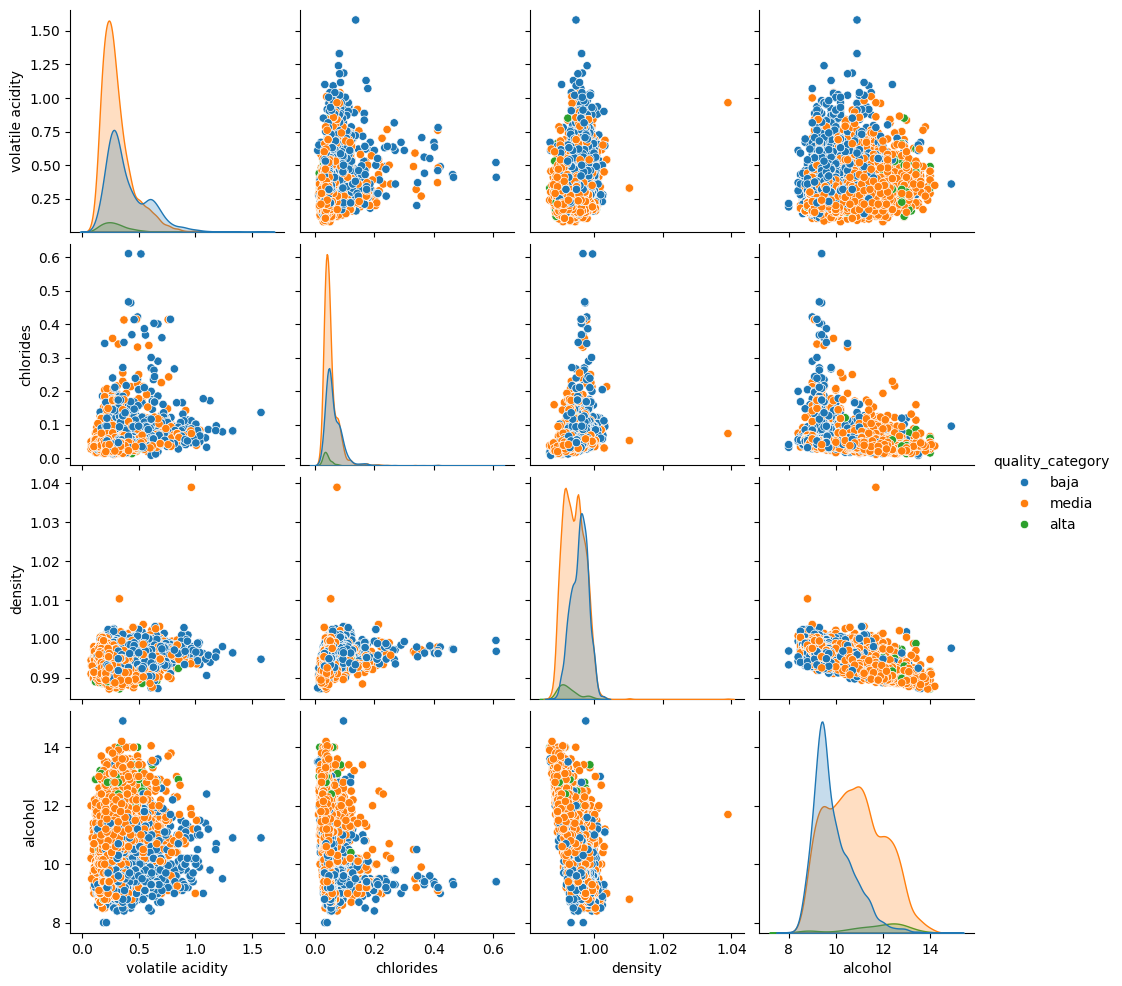

In [5]:
sns.pairplot(df_5[['volatile acidity','chlorides','density','alcohol','quality_category']], hue='quality_category')

In [35]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df_5[['volatile acidity','chlorides','density','alcohol']]
y = df_5["quality_category"]

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10)

In [39]:
modelo_lr = LogisticRegression(
    max_iter=1000,  # Aumentar iteraciones para convergencia
    random_state=10,
    class_weight='balanced',
    multi_class='auto'  # Auto-detecta si es binario o multiclase
)
modelo_lr.fit(X_train, y_train)

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=10)

In [55]:
y_pred = modelo_lr.predict(X_test)
y_proba = modelo_lr.predict_proba(X_test)  # Probabilidades para todas las clases

In [41]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.49
Precision (macro): 0.46351203946357783
Recall (macro): 0.5916897653963121
F1-Score (macro): 0.42326999074193083


In [43]:
# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusión:
[[ 33   7   6]
 [ 33 341  99]
 [278 240 263]]


In [44]:
# 3. Reporte completo (precision, recall, f1 por clase)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.10      0.72      0.17        46
        baja       0.58      0.72      0.64       473
       media       0.71      0.34      0.46       781

    accuracy                           0.49      1300
   macro avg       0.46      0.59      0.42      1300
weighted avg       0.64      0.49      0.51      1300



In [45]:
# 4. ROC-AUC (para multiclase)
if len(modelo_lr.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    print("ROC-AUC (OvR):", roc_auc_score(y_test_bin, y_proba, multi_class='ovr'))
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba[:, 1]))

ROC-AUC (OvR): 0.7285665689869968


### RANDOM FOREST

In [50]:
modelo_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    class_weight='balanced_subsample',
    oob_score=True,
    random_state=10)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=150, oob_score=True,
                       random_state=10)

In [51]:
y_pred_rf = modelo_rf.predict(X_test)
y_proba_rf = modelo_rf.predict_proba(X_test) 

In [53]:
importances = modelo_rf.feature_importances_
importances

array([0.21291151, 0.16862476, 0.21945082, 0.39901291])

### METRICAS

In [54]:

# 2. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))

# 3. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# 4. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# 5. ROC-AUC (para multiclase)
if len(modelo_rf.classes_) > 2:
    roc_auc = roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')
    print("\nROC-AUC (OvR):", roc_auc)
else:
    print("\nROC-AUC:", roc_auc_score(y_test, y_proba_rf[:, 1]))

Accuracy: 0.666923076923077
Precision (macro): 0.5400884833622616
Recall (macro): 0.6336304125577684
F1-Score (macro): 0.5594941415997224

Matriz de Confusión:
[[ 25   0  21]
 [  6 335 132]
 [ 90 184 507]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.21      0.54      0.30        46
        baja       0.65      0.71      0.68       473
       media       0.77      0.65      0.70       781

    accuracy                           0.67      1300
   macro avg       0.54      0.63      0.56      1300
weighted avg       0.70      0.67      0.68      1300


ROC-AUC (OvR): 0.8151130050594982
